<a href="https://colab.research.google.com/github/glo-code/alpopularity/blob/main/job_board_scrapenscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('Ai and Ml popularity.csv',encoding='latin-1')
df.head(25)


,Country,Ai and ML(Popularity),City,Ai and ML(Popularity).1,Top (Searches),Popularity,Rising (Searches),Rising (Searches) Percentage,Top (Searches).1,Popularity.1,Rising (Searches).1,Rising (Searches) Percentage.1
0,Tuvalu,NaN,Sapror,100.0,Artificial intelligence,100.0,Character.ai,5000%,ai character,100.0,chatgpt,5000%
1,Vietnam,100.0,Sil Kapra,74.0,Character.ai,14.0,ChatGPT,5000%,ai generator,48.0,chatgpt ai,5000%
2,China,72.0,Stanford,72.0,Online chat,5.0,Gemini,5000%,ai image,33.0,chat gpt,5000%
3,Romania,63.0,Shenzhen,58.0,OpenAI,4.0,AI Chatbot,5000%,ai chat,30.0,chat gpt ai,5000%
4,Samoa,NaN,Shanghai,57.0,ChatGPT,3.0,Midjourney,5000%,google ai,26.0,bard ai,5000%
5,Italy,54.0,Guangzhou,55.0,Gemini,3.0,Perplexity.ai,5000%,open ai,21.0,bard,5000%
6,Myanmar (Burma),51.0,Beijing,54.0,Leaf,3.0,Generative artificial intelligence,5000%,chatgpt ai,19.0,midjourney,5000%
7,Eritrea,NaN,Palo Alto,45.0,Artificial intelligence art,3.0,Microsoft Copilot,5000%,chatgpt,19.0,midjourney ai,5000%
8,American Samoa,NaN,Juja,43.0,AI Chatbot,2.0,DALL-E,5000%,what is ai,17.0,perplexity ai,5000%
9,Solomon Islands,NaN,Seongnam-si,41.0,Microsoft Bing,2.0,Adobe,5000%,gpt ai,17.0,perplexity,5000%


In [3]:
df.isnull().sum()

Country                             0
Ai and ML(Popularity)             178
City                               50
Ai and ML(Popularity).1            50
Top (Searches)                    225
Popularity                        225
Rising (Searches)                 225
Rising (Searches) Percentage      225
Top (Searches).1                  225
Popularity.1                      225
Rising (Searches).1               225
Rising (Searches) Percentage.1    225
dtype: int64

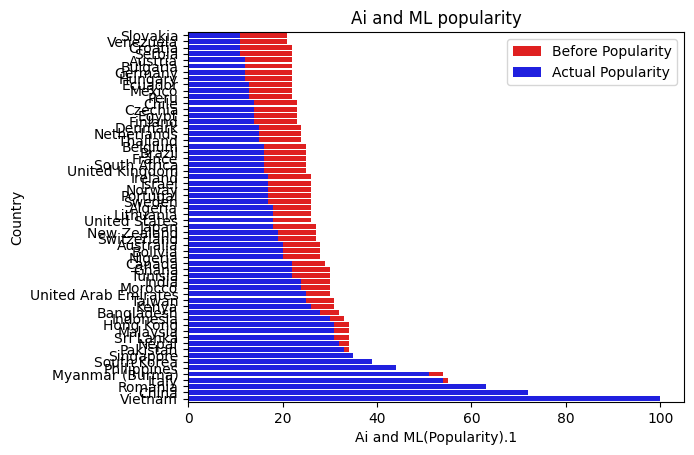

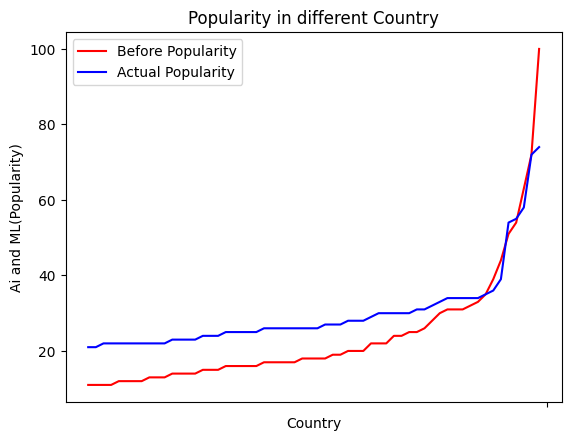

   Ai and ML(Popularity)  Country  Ai and ML(Popularity).1  Country
1                  100.0  Vietnam                     74.0  Vietnam
0                    NaN   Tuvalu                    100.0   Tuvalu 
      Ai and ML(Popularity) Country  Ai and ML(Popularity).1 Country
228                    4.0    Iran                      NaN    Iran
193                    NaN   Niger                     21.0   Niger 

                         Ai and ML(Popularity)  Ai and ML(Popularity).1  \
Ai and ML(Popularity)                 1.000000                 0.981275   
Ai and ML(Popularity).1               0.981275                 1.000000   
diff-popolarità                       0.926859                 0.837196   

                         diff-popolarità  
Ai and ML(Popularity)           0.926859  
Ai and ML(Popularity).1         0.837196  
diff-popolarità                 1.000000  
    Ai and ML(Popularity)  Ai and ML(Popularity).1               Country  \
0                    11.0              

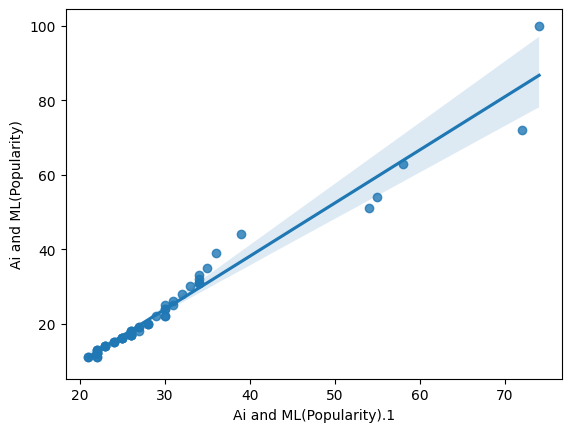

In [18]:
class Popolarità():
  #def __init__(self,colonna):
    #self.colonna=colonna

  def CalcoloPop(self):
    self.top=df[['Ai and ML(Popularity)','Country','Ai and ML(Popularity).1','Country']].iloc[df[['Ai and ML(Popularity)','Ai and ML(Popularity).1']].idxmax()]
    self.min=df[['Ai and ML(Popularity)','Country','Ai and ML(Popularity).1','Country']].iloc[df[['Ai and ML(Popularity)','Ai and ML(Popularity).1']].idxmin()]
    self.group=df.groupby(['Ai and ML(Popularity)','Ai and ML(Popularity).1'])['Country'].value_counts().reset_index().drop(columns='count',axis=1)
    self.group['diff-popolarità']=self.group['Ai and ML(Popularity)']-self.group['Ai and ML(Popularity).1']
    ax=plt.subplots()
    ax=sns.barplot(data=self.group,y='Country',x='Ai and ML(Popularity).1',color='red',label='Before Popularity')
    ax=sns.barplot(data=self.group,y='Country',x='Ai and ML(Popularity)',color='blue',label='Actual Popularity')
    plt.title('Ai and ML popularity')
    plt.show()
    ax1=plt.subplots()
    ax1=sns.lineplot(data=self.group,x='Country',y='Ai and ML(Popularity)',color='red',label='Before Popularity')
    ax1=sns.lineplot(data=self.group,x='Country',y='Ai and ML(Popularity).1',color='blue',label='Actual Popularity')
    plt.title('Popularity in different Country')
    plt.xticks([''])
    plt.show()
    print(self.top,'\n',self.min,'\n')
    print(self.group.corr(numeric_only=True))

  def PrevisionePop(self):
      X=np.array(self.group['Ai and ML(Popularity).1']).reshape(-1,1)
      y=np.array(self.group['Ai and ML(Popularity)']).reshape(-1,1)

      X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
      regressor=LinearRegression()
      regressor.fit(X_train,y_train)
      y_pred=regressor.predict(X_test)
      print(y_pred)
      sns.regplot(data=self.group,x='Ai and ML(Popularity).1',y='Ai and ML(Popularity)')
      print(r2_score(y_test,y_pred))

Popolarità=Popolarità()
Popolarità.CalcoloPop()
print(Popolarità.group)
Popolarità.PrevisionePop()
